#LAB 9 : Dimensionality Reduction

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#PCA

Text(0.5, 1.0, 'distribution in y direction')

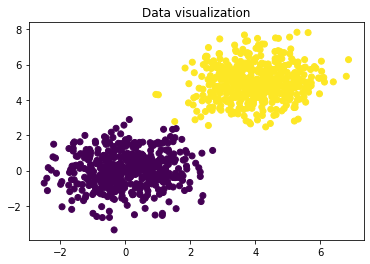

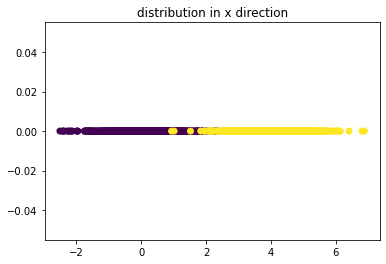

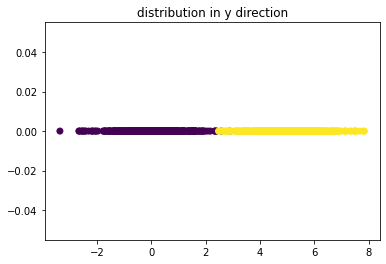

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


Text(0.5, 1.0, 'Data visualization')

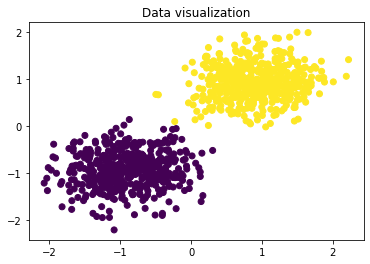

In [3]:
#Data normalization

data1=(data-np.mean(data,axis=0))
data=data1/np.std(data1,axis=0)
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

variance along pca1 direction= 1.8477663843459722
variance along pca2 direction= 0.15223361565402702


Text(0.5, 1.0, 'distribution in pca2 direction')

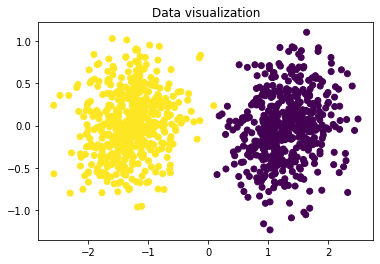

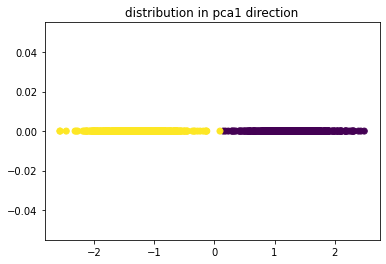

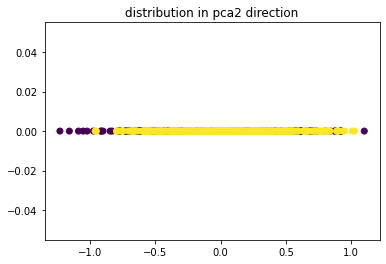

In [4]:
# PCA

# coverance matrix
cov=data.T @ data


# using sigular value decomposition
u,s,v=np.linalg.svd(cov)

trans_data=data @ u

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')

In [5]:
class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data=data
    self.retain_dim=retain_dim if retain_dim is not None else self.ret_dim(self.data)
    # compute pca transform value
  def pca_comp(self,data):
    data=self.pre_process(data)
    cov=data.T @ data
    u,_,_=np.linalg.svd(cov) # singular value decomposition
    u_req=u[:,:self.retain_dim]
    trans_data=data @ u_req
    return trans_data,u_req
    # compute the required retain dimension
  def ret_dim(self,data):
    data=self.pre_process(data)
    cov=data.T @ data
    _,s,_=np.linalg.svd(cov)
    ind=(np.where((np.cumsum(s)/np.sum(s))>0.9))[0][0] # can also take 99% 
    return ind+1
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data

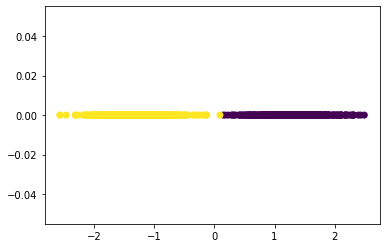

In [6]:
# pca transformation
PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)

In [7]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)


KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


##PCA on MNIST

In [8]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=fb6cbe39f28434f0613cf28186b413adaea6faeba2e89e4ceea2b5b2f9b1e5eb
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


(100, 784)
(100,)


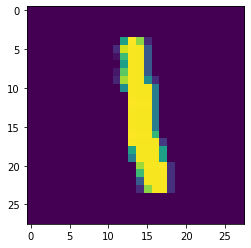

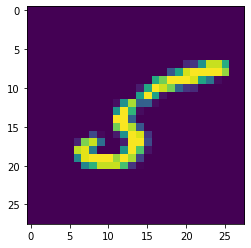

In [15]:
# MNIST data

file1='/content/train-images.idx3-ubyte' ## Change the path accordingly
file2='/content/train-labels.idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



Initial data dimension= 784
Retained dimesion after PCA= 36
KNN Training accuracy = 96.0
(50, 28, 28)
KNN Testing accuracy = 97.0


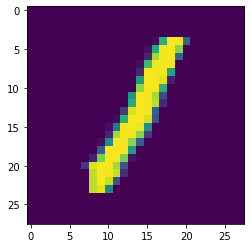

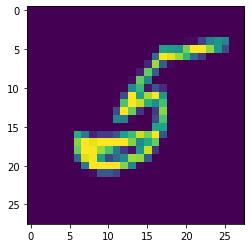

In [16]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


#LDA

Text(0.5, 1.0, 'distribution in y direction')

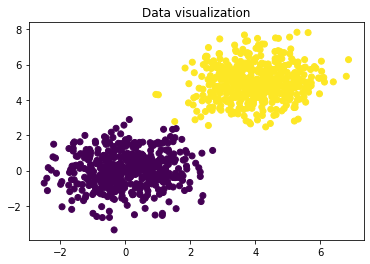

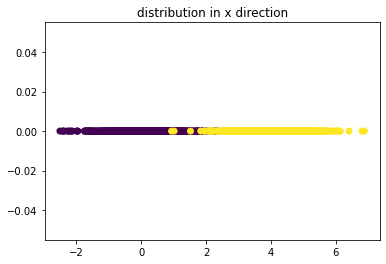

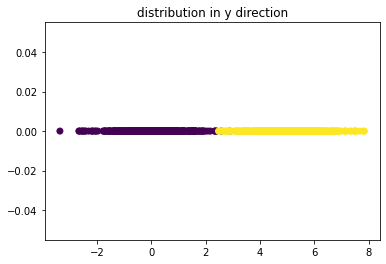

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')

In [36]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))
  cls=np.unique(label)

  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    cov_l[i]=((data_l[i]-mean_l[i]).T @ (data_l[i]-mean_l[i]))/(data_l[i].shape[0]-1)
    S_w=S_w+cov_l[i]


  S_w=S_w/len(data_l)

  if len(data_l)==2:
    S_b=(mean_l[1]-mean_l[0]).T @ (mean_l[1]-mean_l[0])
    w=np.linalg.pinv(S_w) @ (mean_l[1]-mean_l[0]).T

  else:
    S_t=np.cov(data,rowvar=False)
    S_b=S_t-S_w
    u,_,_=np.linalg.svd(np.linalg.pinv(S_w) @ S_b)
    w=u[:,:len(data_l)-1]

  return w




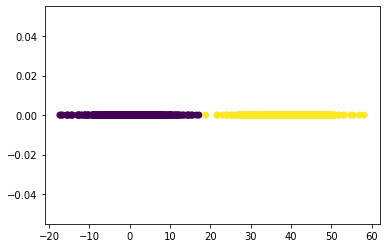

In [25]:
# after LDA projection

w=LDA(data,label)
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c=label)


In [ ]:
#classification using LDA
#use k-nearest neighbour classifier after dimensionality reduction


from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w[:,np.newaxis]
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data_tst=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(data_tst@ w[:,np.newaxis],tst_label)*100)



KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


##LDA Multiclass

Text(0.5, 1.0, 'distribution in y direction')

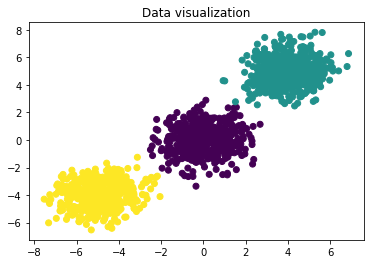

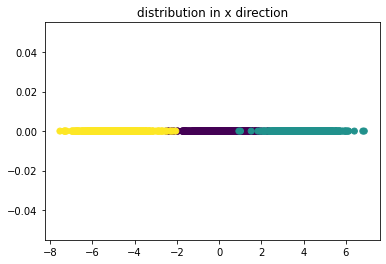

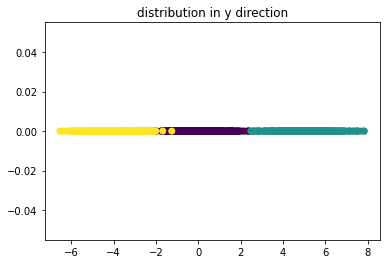

In [12]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


(2, 2)


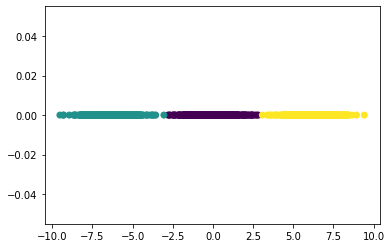

In [13]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,0],np.zeros(data.shape[0]),c=label) # by performing 1D projection

In [14]:
# testing (using KNN)

from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data3=np.random.multivariate_normal(mean3,var,50)
data_tst=np.concatenate((data1,data2,data3))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data2.shape[0])+1))

print('KNN Testing accuracy =',knn.score(data_tst@ w,tst_label)*100)


KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


**Perform LDA on MNIST and Classify using the data of any 3 classes**

(100, 784)
(100,)


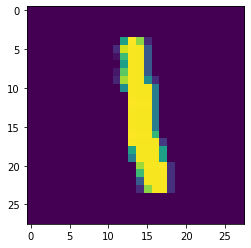

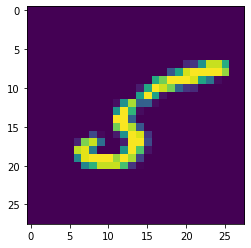

In [35]:
## Write your code here
# MNIST data

file1='/content/train-images.idx3-ubyte' ## Change the path accordingly
file2='/content/train-labels.idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, G_lab, test_size=0.2, random_state=0)

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [41]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print('KNN Training accuracy =',knn.score(X_train, y_train)*100)


KNN Training accuracy = 100.0


In [43]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)*100))

[[9 1]
 [1 9]]
Accuracy90.0
